# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/000000/external-image-analysis-big-data-flaticons-lineal-color-flat-icons-2.png" style="height:50px;display:inline"/> EE 046200 - Technion - Image Processing and Analysis
----

# Computer Homework 2
---
### <span style="color:red"> Due Date: 01.08.24 </span>

## <img src="https://img.icons8.com/clouds/100/000000/upload.png" style="height:50px;display:inline" /> Submission guidelines
---

### READ THIS CAREFULLY

*	**Please notice:** Some of the exercises contain questions on topics that are yet to be taught in the lecture or the frontal exercises. You may consider them as background or preparation questions to the topic before learning about it in class, or you may wait until the topic is taught, and solve only the questions on the topics you already learned.
*	**Avoid unethical behavior.** This includes plagiarism, not giving credit to source code you decide to use, and false reporting of results. Consulting with friends is allowed and even recommended, but you must write the code on your own, independently of others. The staff will treat unethical behavior with the utmost severity. **!אנא המנעו מהתנהגות שאינה אתית והעתקות**
*	Code submission in **Python only**.
    You can choose your working environment:
    * You can work in a Jupyter Notebook , locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> (the course's computer HW will not require a GPU).
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>. Both also allow opening/editing Jupyter Notebooks.
*	The exercise must be submitted **IN PAIRS** (unless the computer homework grader approved differently) until **<span style="color:red"> Wednesday 01.08.2024 at 23:55</span>**.
*	The exercise will be submitted via Moodle in the following form:
    You should submit two **separated** files:
    * A report file (visualizations, discussing the results and answering the questions) in a `.pdf` format, with the name `hw2_id1_id2.pdf` where `id1`,`id2` are the ID numbers of the submitting students.
        * Be precise, we expect on point answers. But don't be afraid to explain you statements (actually, we expect you to).
        * Even if the instructions says "Show/Display...", you still need to explain what are you showing and what can be seen.
        * No other file-types ( `.docx` , `.html` , ...) will be accepted
    * A compressed `.zip` file, with the name: `hw2_id1_id2.zip` which contains:
        * A folder named `code` with all the code files inside ( `.py` or `.ipynb` ONLY!)
            *	The code should be reasonably documented, especially in places where non-trivial actions are performed.
            *	Make sure to give a suitable title (informative and accurate) to each image or graph, and also to the axes. Ensure that graphs and images are displayed in a sufficient size to understand their content (and maintain the relationship between the axes - do not distort them).
        * A folder named `my_data`, with all the files required for the code to run (your own images/videos). make sure to refer to your input files in the code locally. i.e. (if the code is in 'code' directory, and the input file is in a parallel 'my_data' directory:
            `img = cv2.imread('../my_data/my_img.jpg')`
        * **DO NOT** include the given input data in the zip. The code should refer to the given input data as it is located in a folder named `given_data`. i.e.:
            `img = cv2.imread('../given_data/given_img.jpg')`
*	If you submit your solution after the deadline, 4 points will be reduced automatically for each of the days that have passed since the submission date (unless you have approved it with the course staff before the submission date). Late submission will be done directly to the computer homework grader via mail, and not via Moodle.
*	Several Python, numpy, openCV reference files are attached in the Moodle website, and you can of course also use the Internet's help.
*	Questions about the **computer** exercise can be directed to the computer homework grader through the relevant Moodle forum or by email **and not during the workshop hours**.


## <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> General Notes:
---
### The ‘imshow’ function:
Full name: `matplotlib.axes.Axes.imshow`

The ‘imshow’ function is used to display images. The function expects to get a matrix whose members are in "discrete" `unit8` format (in the range [0,255]) or in "continuous" `float` format (in the range [0,1]). the dynamic range is determined by the format. These formats are acceptable for images. 


In [82]:
# imports for the HW
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

## <img src="https://img.icons8.com/doodle/48/000000/puzzle.png" style="height:50px;display:inline"/> Part 1 - Solving a Puzzle 
---
In this part we will learn how to solve a 5-piece puzzle. You will be adding and "stitching" different images into a single big image. In order to do so, you will implement template matching using the correlation method (according to the principles presented in class).

During this part, we will use an image taken from "Where's Wally", and we will also try to find him!

**Report your results for each subsection. Explain successes and failures.**

### 1.a - Find The Location of High Correlation:
To create the puzzle image with good stitching between two images, we have to find similar regions of interest between the images. In order to achieve this, we use the Correlation Index (convolution without the kernel mirroring). The Correlation Index is defined for one-dimensional signals $f[n],g[n]$ as:
$$ (f\star g)[n] =\sum_{m=-\infty}^{\infty} f[m]g[m+n]$$
This means, it is the same as convolution, but without the mirroring.

Implement the `match_corr` function. 

The function accepts as inputs:
1. 2D numpy array `corr_obj` containing an image of a certain component (e.g., an apple tree). 
1. 2D numpy array `img`, which must have equal or larger height and width compared to `corr_obj`. The `img` input is an image that contains the component from `corr_obj` (e.g. - an image of a graden with the same apple tree in it). 

The function performs 2D correlation between the input arrays and return the location (indices) of `corr_obj`'s center using the coordinates of `img`.

For example, given the following `corr_obj` (left) and `img` (right):

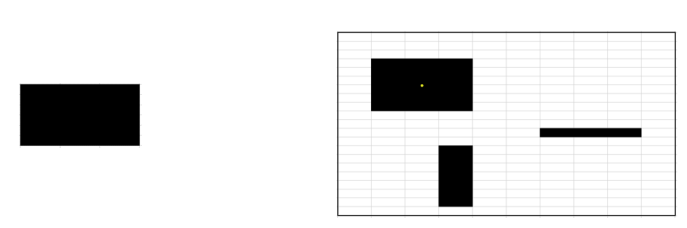

The output of the function is the 2D coordinates of the yellow dot in `img`.

In [83]:
def match_corr(corr_obj, img):
    """
    return the center coordinates of the location of 'corr_obj' in 'img'.
    :param corr_obj: 2D numpy array of size [H_obj x W_obj] 
                     containing an image of a component.
    :param img: 2D numpy array of size [H_img x W_img] 
                where H_img >= H_obj and W_img>=W_obj, 
                containing an image with the 'corr_obj' component in it.
    :return:
        match_coord: the two center coordinates in 'img' 
                     of the 'corr_obj' component.
    """
    # ====== YOUR CODE: ======
    #Normalizing the images
    normalized_corr_obj = (corr_obj - np.mean(corr_obj)) / np.std(corr_obj)
    noramlized_img = (img - np.mean(img)) / np.std(img)
    
    #Getting the correlation
    filtered_img = cv2.filter2D(noramlized_img, -1, normalized_corr_obj, borderType=cv2.BORDER_CONSTANT)

    #Getting the coordinates of the object
    match_coord = np.unravel_index(np.argmax(filtered_img), filtered_img.shape)
    # ========================
    
    return match_coord


**Notes:**
* Use the `cv2.filter2D` method to perform the correlation.
* Note that the output image is the same size as the input image. Be sure to choose `borderType=cv2.BORDER_CONSTANT` to pad the source image with zeros (similar to 'same' convolution).
* Notice that you should normalize the object and the image.

### 1.b - Pre-Processing:

Load `Where's_Wally.jpg`. 

Transform it to grayscale.

Given that the grayscale image has a size of $H\times W$, crop the grayscale image leaving only the middle part of it (80% of the original image height $H$ and width $W$) as follows:
1. Crop $0.1H$ from the top side of the grayscale image.
2. Crop $0.1H$ from the bottom side of the grayscale image.
3. Crop $0.1W$ from the left side of the grayscale image.
4. Crop $0.1W$ from the right side of the grayscale image.

Sanity check: the cropped grayscale image should be of size $0.8H\times 0.8W$.

Create a new `np.zeros` array. Make the zeros array the same size as the original grayscale image. 

Add the cropped grayscale image to the zeros array, placing it in the middle. 

Display the original grayscale image and the cropped Image (with its black frame).

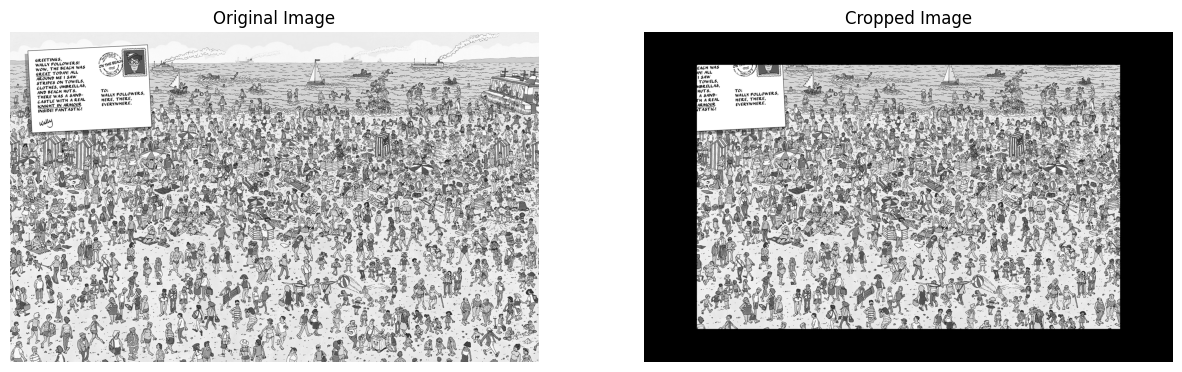

In [84]:
# ====== YOUR CODE: ======
#Getting the image and the object
wally_filepath = os.path.join("..", "given_data", "Where's_Wally.jpg")
wheres_wally_img = cv2.imread(wally_filepath, cv2.IMREAD_GRAYSCALE)
#Creating the cropped image
h, w = wheres_wally_img.shape
cropped_wally = wheres_wally_img[int(0.1*h):int(0.9*h), int(0.1*w):int(0.9*w)]
# ========================
blank_img = np.zeros_like(wheres_wally_img)
blank_img[int(0.1*h):int(0.9*h), int(0.1*w):int(0.9*w)] = cropped_wally



fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(wheres_wally_img, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(blank_img, cmap='gray')
ax[1].set_title("Cropped Image")
ax[1].axis('off')
plt.show()
# ========================

### 1.c - Frames matching and Puzzle solving
Use the four pieces you have in `given_data`, and load them.

Apply the `match_corr` function four times, once for every piece.
Find the indices where you should place every piece of the puzzle.

Display the whole image after inserting each puzzle piece. Set the titles to be the respective output coordinates of the `match_corr` function.

Note: you might need to crop your puzzle pieces to fit in depending on how well you implemented `match_corr`.


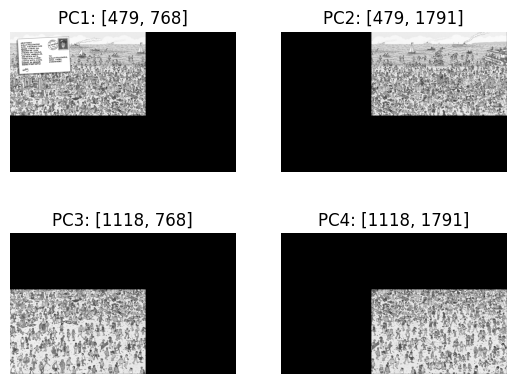

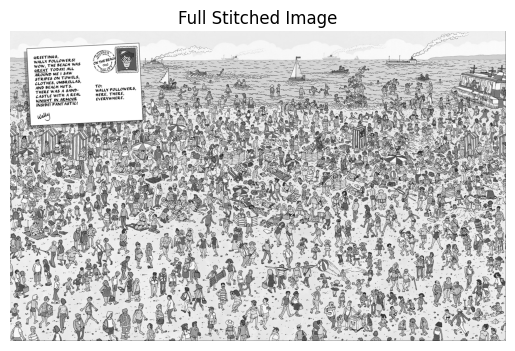

In [85]:
# ====== YOUR CODE: ======
pc1_filepath = os.path.join("..", "given_data", "PC1.jpg")
pc2_filepath = os.path.join("..", "given_data", "PC2.jpg")
pc3_filepath = os.path.join("..", "given_data", "PC3.jpg")
pc4_filepath = os.path.join("..", "given_data", "PC4.jpg")

pc1_img = cv2.imread(pc1_filepath, cv2.IMREAD_GRAYSCALE)
pc2_img = cv2.imread(pc2_filepath, cv2.IMREAD_GRAYSCALE)
pc3_img = cv2.imread(pc3_filepath, cv2.IMREAD_GRAYSCALE)
pc4_img = cv2.imread(pc4_filepath, cv2.IMREAD_GRAYSCALE)

indices_1 = match_corr(pc1_img, wheres_wally_img)
indices_2 = match_corr(pc2_img, wheres_wally_img)
indices_3 = match_corr(pc3_img, wheres_wally_img)
indices_4 = match_corr(pc4_img, wheres_wally_img)

indices_arr = [indices_1, indices_2, indices_3, indices_4]

def insert_part_of_image(img, center_indices, part_img, fit_bit=0):
    h, w = part_img.shape
    h_center, w_center = center_indices
    h_start = h_center - h//2 
    h_end = h_center + h//2
    w_start = w_center - w//2
    w_end = w_center + w//2
    img[h_start:h_end, w_start:w_end+fit_bit] = part_img
    # return img
blank_img = np.zeros_like(wheres_wally_img)
puzzle_pieces = [np.copy(blank_img) for _ in range(4)]

insert_part_of_image(puzzle_pieces[0], indices_1, pc1_img)
insert_part_of_image(puzzle_pieces[1], indices_2, pc2_img, 1)
insert_part_of_image(puzzle_pieces[2], indices_3, pc3_img)
insert_part_of_image(puzzle_pieces[3], indices_4, pc4_img, 1)

fig, axs = plt.subplots(2, 2)

for i in range(2):
    for j in range(2):
        axs[i, j].imshow(puzzle_pieces[i*2+j], cmap='gray')
        axs[i, j].set_title(f'PC{i*2+j+1}: {np.array(indices_arr[i*2+j]).tolist()}')
        axs[i, j].axis('off')


full_stitched_img = np.zeros_like(wheres_wally_img)

insert_part_of_image(full_stitched_img, indices_1, pc1_img)
insert_part_of_image(full_stitched_img, indices_2, pc2_img, 1)
insert_part_of_image(full_stitched_img, indices_3, pc3_img)
insert_part_of_image(full_stitched_img, indices_4, pc4_img, 1) 

fig, ax = plt.subplots(1, 1)
ax.imshow(full_stitched_img, cmap='gray')
ax.set_title("Full Stitched Image")
ax.axis('off')
plt.show()

# ========================

### 1.d - Finding Wally!

Now that we have the big stitched image, we can finally try to find Wally (You can try first on your own, but it's a hard one).

Load `Wally.jpg` Image from given data, convert the image to grayscale and display it.

Find him using the `match_corr` function you implemented. Now you got Wally's center image coordinates.

**Plot** a black circle around Wally's center. Make sure the circle's radius is sufficient so that Wally is visible.


Hints for plotting the circle: think about a circle equation, with a given radius, and blacken all the pixels which have coordinates that satisfy this equation (you may use a certain tolerance to the chosen radius). You can also look for built-in `matplotlib` circle functions.

**Mention in your report what method you used and which radius you chose.**

Display the image with the circle around Wally (note that you need to convert it to RGB first). 

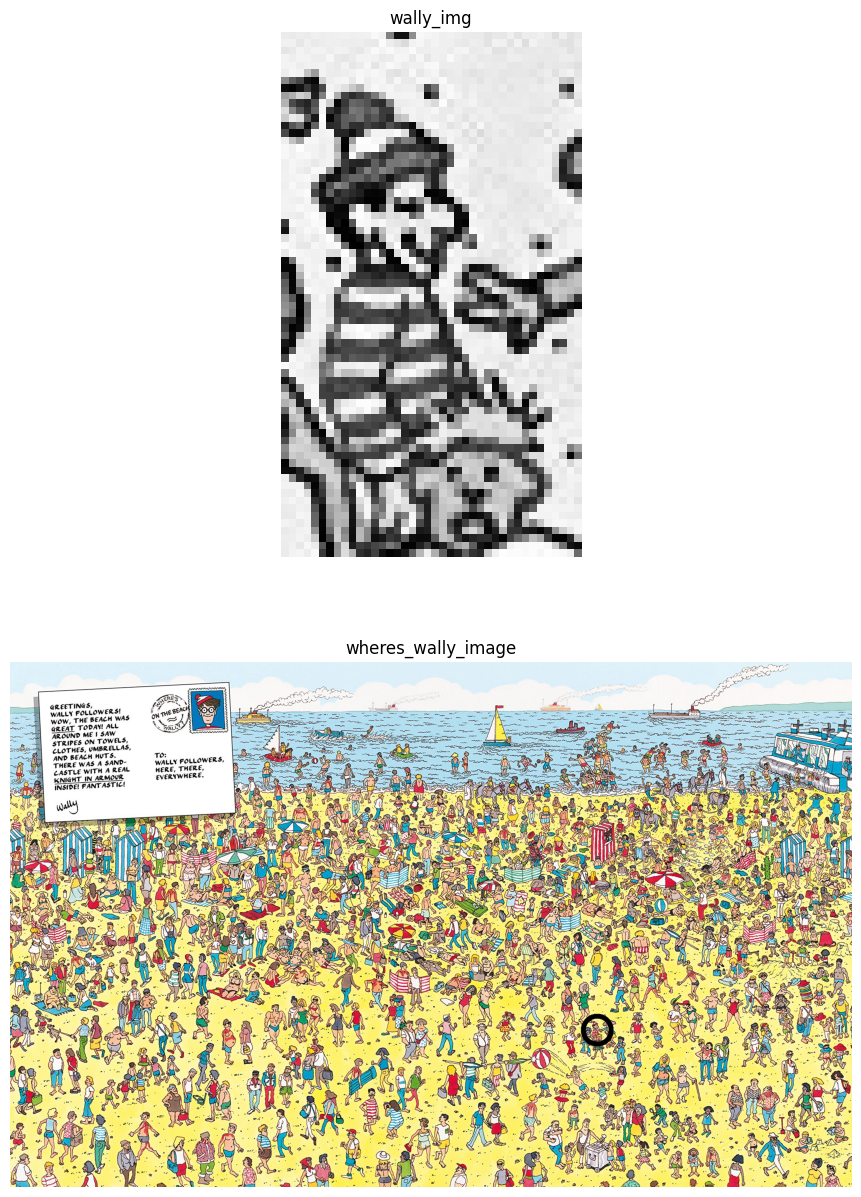

In [86]:
    # ====== YOUR CODE: ======
wally_filepath = os.path.join("..", "given_data", "Wally.jpg")
wheres_wally_full = os.path.join("..", "given_data", "Where's_Wally.jpg")

wally_img = cv2.imread(wally_filepath, cv2.IMREAD_GRAYSCALE)
wheres_wally_RGB = cv2.imread(wheres_wally_full)

wheres_wally_image_RGB =  cv2.cvtColor(wheres_wally_RGB, cv2.COLOR_BGR2RGB)
wally_indices = match_corr(wally_img, full_stitched_img)

for m in range(wheres_wally_image_RGB.shape[0]):
        for n in range(wheres_wally_image_RGB.shape[1]):
            wallys_circle = ((m-wally_indices[0])**2 + (n-wally_indices[1])**2)**0.5
            if(wallys_circle < 50 and wallys_circle > 35):
                wheres_wally_image_RGB[m, n] = 0
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].imshow(wally_img, cmap='gray')
axs[0].set_title(f'wally_img')
axs[0].axis('off')
axs[1].imshow(wheres_wally_image_RGB, cmap='gray')
axs[1].set_title(f'wheres_wally_image')
axs[1].axis('off')

plt.show()
# plt.imshow(wally_img, cmap='gray')

# plt.imshow(wheres_wally_image_RGB)

    # ========================

## <img src="https://img.icons8.com/?size=100&id=UcMpFREbKKmb&format=png&color=000000" style="height:50px;display:inline"/> Part 2 - Spatial Filtering and Morphological Operations
---
In This part we would like to examine a fun use of the morphological operations and spatial filters.

We will use a Minesweeper game board image to extract an image containing only the mines' locations.

If you want to take a break, that's fine. Here's a link to the game:
https://g.co/kgs/38t3q1w

You are encouraged to read the following openCV tutorial about morphological operations <br>
https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html


### 2.a - Morphological operations
1. Load and display the image `mines.jpg` in grayscale.
1. Create two morphological kernels: 
    1. A vertical line, 3 pixels long.
    1. A horizontal line, 3 pixels long.
1. Apply erosion on the grayscale image using each of the kernels **separately** and display the two resulting images.
   What are the geometrical structures being preserved in each of the resulting images?
1. Sum the two images from the above section and display the summation image. Choose a threshold of `0.4*255` and transform the image to be binary - containing only `0` and `255` pixels. Display the result.


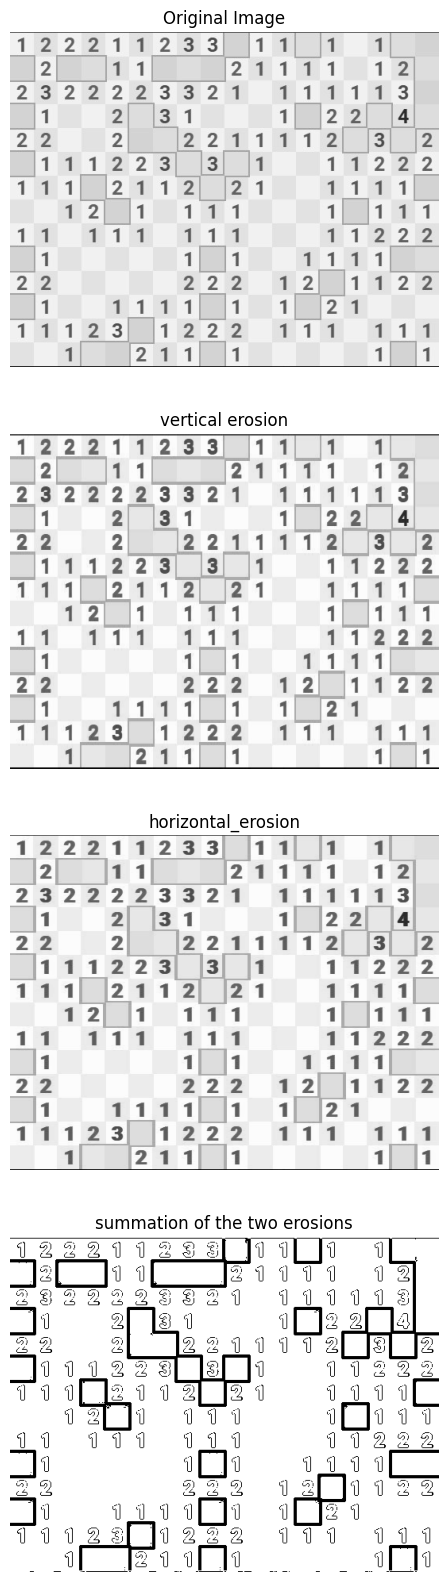

In [87]:
    # ====== YOUR CODE: ======
mines_gray_img = cv2.imread(os.path.join("..", "given_data", "mines.jpg"), cv2.IMREAD_GRAYSCALE)
vertical_line_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
horizontal_line_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 1))

vertical_erosion = cv2.erode(mines_gray_img,vertical_line_kernel,iterations = 1)
horizontal_erosion = cv2.erode(mines_gray_img,horizontal_line_kernel,iterations = 1)

sum_erosion = vertical_erosion + horizontal_erosion
sum_erosion[sum_erosion>0.4*255] = 255
sum_erosion[sum_erosion<=0.4*255] = 0

fig, axs = plt.subplots(4, 1, figsize=(20,20))
axs[0].imshow(mines_gray_img, cmap='gray')
axs[0].set_title(f'Original Image')
axs[0].axis('off')
axs[1].imshow(vertical_erosion, cmap='gray')
axs[1].set_title(f'vertical erosion')
axs[1].axis('off')
axs[2].imshow(horizontal_erosion, cmap='gray')
axs[2].set_title(f'horizontal_erosion')
axs[2].axis('off')
axs[3].imshow(sum_erosion, cmap='gray')
axs[3].set_title(f'summation of the two erosions')
axs[3].axis('off')

plt.show()

    # ========================

### 2.b - Median filtering
At this point we would like to use a median filter to isolate the mines locations.

The mines locations are the connected components that contains grass, and a mine is hiding below. 

Perform a logical inversion (`NOT`) on the image from section 2.a. 

Apply a median filter using a `3x3` kernel and the `cv2.medianBlur` function. Explain why a median filter is appropriate (i.e., why did we not choose a mean filter)?

(np.float64(-0.5), np.float64(539.5), np.float64(421.5), np.float64(-0.5))

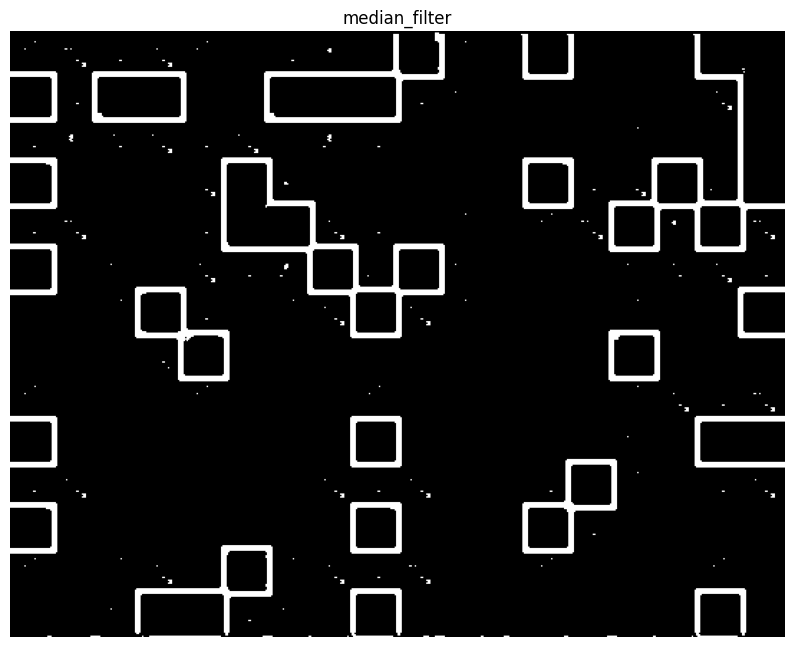

In [88]:
    # ====== YOUR CODE: ======
#logical inversion of the image
inverted_img = cv2.bitwise_not(sum_erosion)
median_filtered_img = cv2.medianBlur(inverted_img, 3)
fig, axs = plt.subplots(1, 1, figsize=(10,10))
axs.imshow(median_filtered_img, cmap='gray')
axs.set_title(f'median_filter')
axs.axis('off')
    # ========================

### 2.c - Back to morphological operations
Now, we want to refine the mines' placement better since it is possible that the connection image from section 2.b also contains the edges of the mines' squares.

Create a third squared kernel, with a size of 2x2 and apply erosion to the image from section 2.b using it. Present the result obtained.

(np.float64(-0.5), np.float64(539.5), np.float64(421.5), np.float64(-0.5))

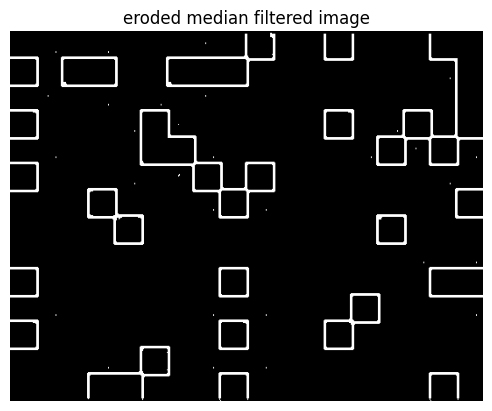

In [89]:
    # ====== YOUR CODE: ======
squared_kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
eroded_img = cv2.erode(median_filtered_img, squared_kernal, iterations=1)
plt.imshow(eroded_img, cmap='gray')
plt.title('eroded median filtered image')
plt.axis('off')
    # ========================

### 2.d - Image sharpening and final thresholding
1. Perform an intersection between the result image from 2.c and the original image (e.g., by converting the binary image to `0,1` values and multiplying the images element-wise). Note: this multiplication is defined only for two arrays with the same type, so make sure both images are of `uint8` type.
1. Sharpen the image by filtering it using the filter kernel $K$ and the openCV function `cv2.filter2D` where:
$$K=\begin{bmatrix}
0 & -1 & 0\\
-1 & 5 & -1\\
0 & -1 & 0
\end{bmatrix}$$
**Display** the sharpened result. Why does this filter make the image sharper?
* Note that `cv2.filter2D` performs correlation and not convolution, but in our case is doesn't matter because $K$ is symmetric.

3. Finally, to remove the unnecessary background, choose a threshold value that gives a good result in your opinion and transform the image to be binary. 

**Display** the final binary result and specify the chosen threshold in the title. 

Did you succeed in creating an image that contains only the mines' locations? Are there any problems in the final result? Explain.

(np.float64(-0.5), np.float64(539.5), np.float64(421.5), np.float64(-0.5))

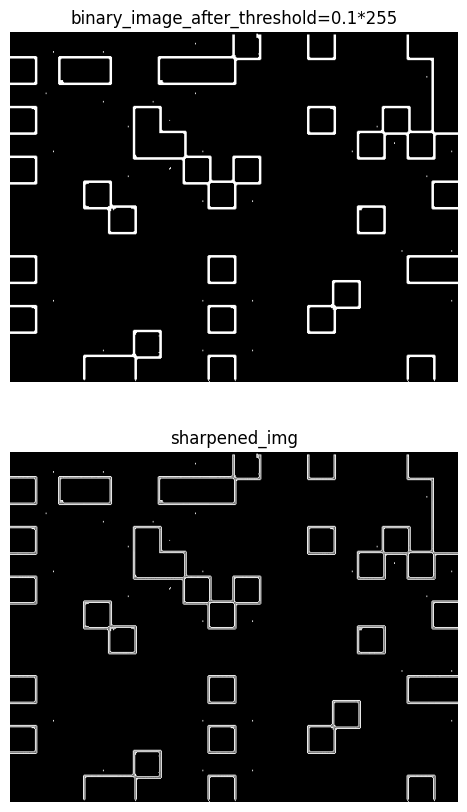

In [90]:
    # ====== YOUR CODE: ======
eroded_img[eroded_img==255] = 1
intersection = eroded_img * mines_gray_img
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_img = cv2.filter2D(intersection, -1, sharpening_kernel)

_,binary_image_after_threshold = cv2.threshold(sharpened_img,0.1*255,255,cv2.THRESH_BINARY)

fig, axs = plt.subplots(2,1, figsize=(10,10))
axs[0].imshow(binary_image_after_threshold, cmap='gray')
axs[0].set_title(f'binary_image_after_threshold=0.1*255')
axs[0].axis('off')
axs[1].imshow(sharpened_img, cmap='gray')
axs[1].set_title(f'sharpened_img')
axs[1].axis('off')


    # ========================

## <img src="https://img.icons8.com/external-others-pike-picture/50/000000/external-comparison-recognition-others-pike-picture.png" style="height:50px;display:inline"/> Part 3 - Image Restoration
---
In this part we aim to restore an image from its noisy version. In class, you learned about image restoration as solutions to optimization problems. This field views images from a probabilistic standpoint to restore blurred or noisy images.

During this part we will use the movie trailer of Flash Gordon. Feel free to open the file `Flash Gordon Trailer.mp4`, to watch the video and enjoy the great music by Queen. :)

For this task, we'll test two different restoration algorithms. However, to do so, we need to create a noisy version of a given image first.

### 3.a - Pre-processing - Creating a noisy image
* Load one frame from the video `Flash Gordon Trailer.mp4`. The frame must be taken from the time section `00:20-00:21`. The python workshop document can help with this task.
* Display this frame as a color image. 
* Choose **one** of the color channels out of the chosen frame: the **red** channel or the **green** channel. Display the grayscale image of the chosen channel. 
* Decrease the size of the image by a factor of 2 using `cv2.resize`. From now on we will use only this channel (after the resize) as our original image.
* Implement the `poisson_noisy_image` function, defined below, by following this procedure:<br>
  Let $a$ be the number of photons that have to arrive into the camera in order to be translated into one gray level. Now, we will create our Poisson noisy image (a.k.a shot noise) in a way which simulates realistic noise induced in an image taken by an optical camera (photon counting):
    1. transform the type of `X`, the input image, to `float` (the values of the image should still be in the range of `[0,255]`, just represented as `float` istead of `uint8`) and multiply the gray level values by $a$ in order to transform the image to number of photons units.
    2. Create a new Poisson noisy image by applying `np.random.poisson` on your image. Using this command, the value of every pixel in the input (number of photons) is referred to as the mean of a Poisson-distributed random variable.
    3. Divide the resulting image by $a$ in order to return the image to normal gray levels.
    4. Clip the image to `[0,255]` using `np.clip`, and transform the image type back to `uint8`.
    5. The noisy image you got will be the image $Y$.
* Make a noisy image out of the resized grayscale image using the `poisson_noisy_image` function with `a=3`.
* Display the noisy image result.


In [91]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

def poisson_noisy_image(X, a):
    """
    Creates a Poisson noisy image.
    :param X: The Original image. np array of size [H x W] and of type uint8.
    :param a: number of photons scalar factor
    :return:
        Y: The noisy image. np array of size [H x W] and of type uint8.
    """
    # ====== YOUR CODE: ======
    #Converting the image to float (64bits)
    X = X.astype(np.float64) 
    X = X*a
    # Creating the noise 
    Y = np.random.poisson(X)
    Y = Y/a
    Y = np.clip(Y, 0, 255)
    Y = Y.astype(np.uint8)

    
    return Y

(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

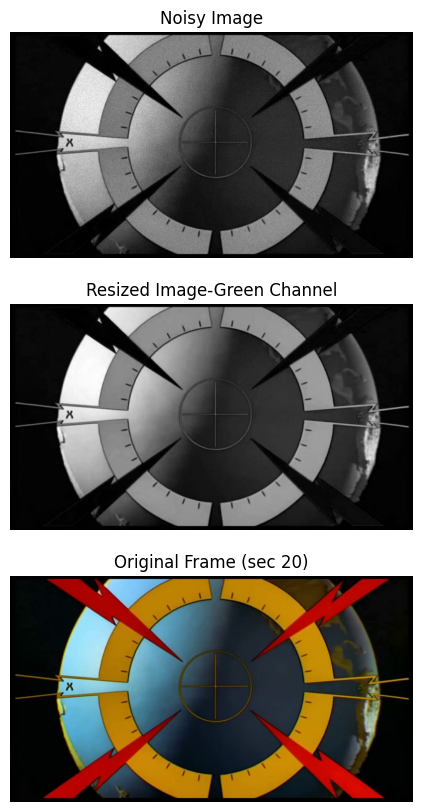

In [140]:
    # ====== YOUR CODE: ======
video_path = os.path.join("..", "given_data", "Flash Gordon Trailer.mp4")
video = cv2.VideoCapture(video_path)
frame_rate = video.get(cv2.CAP_PROP_FPS)
frame_number = int(frame_rate * 20)
video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = video.read()
video.release()
green_channel = frame[:,:,1]
resized_image = cv2.resize(green_channel, (int(green_channel.shape[1]/2), int(green_channel.shape[0]/2)))
noisy_image = poisson_noisy_image(resized_image,3)




fig, axs = plt.subplots(3,1, figsize=(10,10))
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
axs[0].imshow(noisy_image, cmap='gray')
axs[0].set_title(f'Noisy Image')
axs[0].axis('off')
axs[1].imshow(resized_image, cmap='gray')
axs[1].set_title(f'Resized Image-Green Channel')
axs[1].axis('off')
axs[2].imshow(frame)
axs[2].set_title(f'Original Frame (sec 20)')
axs[2].axis('off')


### 3.b - Denoise by L2
Let $Y$ be a noisy image version of the image $X$. In order to restore $X$ out of $Y$ we would would to minimize the following expression (cost function):
$$\varepsilon^2\{\underline{X}\}=(\underline{X}-\underline{Y})^T(\underline{X}-\underline{Y})+\lambda(D\underline{X})^T(D\underline{X})$$

Where $\underline{X}$ is a column-stack vector of the image $X$, $\underline{Y}$ is a column-stack vector of the noisy image $Y$, $\lambda$ is the regularization parameter, and $D$ is a sparse matix of the Laplacian operator, given by the kernel:
$$D_{kernel}=\begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{bmatrix}$$

In order to restore the source image we will apply an iterative process, based on the Steepest Descent algorithm. The update step of the algorithm is:
$$\underline{\hat{X}}_{k+1} = \underline{\hat{X}}_{k}-\mu_k\underline{G}_k = \underline{\hat{X}}_{k}-\mu_k((I+\lambda D^TD)\underline{\hat{X}}_{k}-\underline{Y})$$
Where $I$ is the identity matrix and $\mu_k$ is the step size, which is determined by:
$$\mu_k = \frac{\underline{G}_k^T\underline{G}_k}{\underline{G}_k^T(I+\lambda D^TD)\underline{G}_k}$$
The process is initialized with $\underline{\hat{X}}_{0}=\underline{Y}$.

Implement the algorithm described above in the following function, where `Err1,2` are defined as follows:
$$
Err1\{\underline{\hat{X}}_{k}\}=(\underline{\hat{X}}_{k}-\underline{Y})^T(\underline{\hat{X}}_{k}-\underline{Y})+\lambda (D\underline{\hat{X}}_{k})^T(D\underline{\hat{X}}_{k})
$$
$$
Err2\{\underline{\hat{X}}_{k}\}=(\underline{\hat{X}}_{k}-\underline{X})^T(\underline{\hat{X}}_{k}-\underline{X})
$$

In [152]:
def denoise_by_l2(Y, X, num_iter, lambda_reg):
    """
    L2 image denoising.
    :param Y: The noisy image. np array of size [H x W]
    :param X: The Original image. np array of size [H x W]
    :param num_iter: the number of iterations for the algorithm perform
    :param lambda_reg: the regularization parameter
    :return:
    Xout: The restored image. np array of size [H x W]
    Err1: The error between Xk at every iteration and Y.
    np array of size [num_iter]
    Err2: The error between Xk at every iteration and X.
    np array of size [num_iter]
    """
    # ====== YOUR CODE: ======
    #flatten inputs
    Y = Y.flatten('F')
    X_hat = Y
    X_flat = X.flatten('F')
    
    #create kernels
    D = np.array(([0, 1, 0], [1, -4, 1], [0, 1, 0]))
    D_squared = D @ D
    
    #create error vectors
    Err1 = np.zeros(num_iter)
    Err2 = np.zeros(num_iter)
    
    #Gradiant descent
    for i in range(num_iter):
        X_conv_D_squared = cv2.filter2D(np.reshape(X_hat,X.shape,order = 'F'),-1,lambda_reg*D_squared,borderType=cv2.BORDER_CONSTANT)
        X_conv_D_squared = X_conv_D_squared.flatten('F')
        G = X_hat + X_conv_D_squared - Y
        
        #calculate step size
        G_conv_D_squared = cv2.filter2D(np.reshape(G,X.shape,order = 'F'),-1,lambda_reg*D_squared,borderType=cv2.BORDER_CONSTANT)
        G_conv_D_squared = G_conv_D_squared.flatten('F')
        mu = (G.T @ G) / (G.T@G + G.T @ G_conv_D_squared)
        
        #next iteration
        X_hat = X_hat - mu*G
        
        #calculation Err1
        X_conv_D = cv2.filter2D(np.reshape(X_hat,X.shape,order = 'F'),-1,D,borderType=cv2.BORDER_CONSTANT)
        X_conv_D = X_conv_D.flatten('F')
        Err1[i] = (X_hat - Y).T @ (X_hat - Y) + lambda_reg*(X_conv_D.T @ X_conv_D)
        
        #calculation Err2
        Err2[i] = (X_hat - X_flat).T @ (X_hat - X_flat)
    
    
    Xout = np.reshape(X_hat,X.shape,order = 'F')
    # ========================

    return Xout, Err1, Err2

Note that your algorithm uses the original image `X` only to calculate `Err2`, you sould not use it anywhere else in the algorithm!

**Guidance**: Note that your inputs `Y,X` and your output `Xout` are image matrices (2d numpy arrays), but $\underline{Y},\underline{\hat{X}}, \underline{\hat{X}}_k$ are column-major order vectors. Use `npmatrix.flatten('F')` to create a column-order vector out of `npmatrix`. In addition, it is recommended to calculate the multlipication with $D$ using convolution with the kernel, and **not** calculating the full Toeplitz matrix. Note that every time you encounter a multlipication with $D$ in your calculation you must:
1. Transform the column vector into a matrix, using column-major order (`np.reshape(vector, newshape, order='F')`).
2. Convolve the matrix with the kernel using `cv2.filter2D` (note that the result has the same size as the input - 'same' convolution, and again - $D_{kernel}$ is symmetric so it doesn't matter that `cv2.filter2D` performs correlation and not convolution).
3. Transform the resulting matrix back to a cloumn vector.
* Notice that for example the $\lambda D^T D \underline{\hat{X}}$ part requires you to do the above process twice.

Now, use the function you wrote on the noisy image you created in section 3.a. use `lambda_reg = 0.5` and `num_iters = 50`. Display the result of the restoration in your report.

In addition, display **on a single graph** a logarithmic plot of the errors `Err1` and `Err2` as a function of the iteration number, and explain.

C:\Users\dorye\AppData\Local\Temp\ipykernel_37664\4155042844.py:39: RuntimeWarning: overflow encountered in scalar add
  mu = (G.T @ G) / (G.T@G + G.T @ G_conv_D_squared)


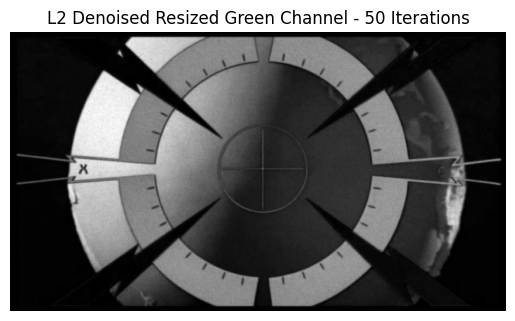

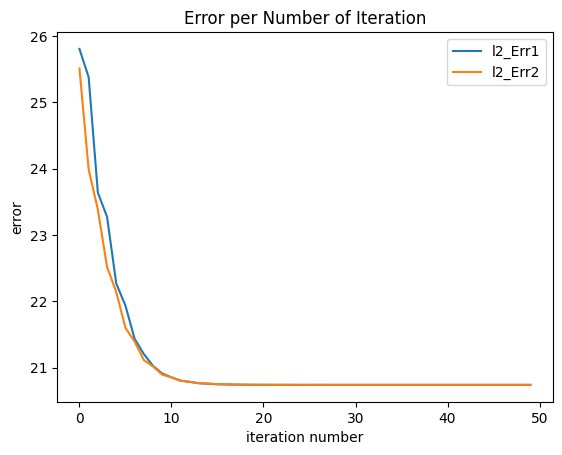

In [153]:
    # ====== YOUR CODE: ======
l2_denoised_image, l2_Err1, l2_Err2 = denoise_by_l2(noisy_image, resized_image, 50, 0.5)

#denoised image
plt.imshow(l2_denoised_image, cmap = 'gray')
plt.title ('L2 Denoised Resized Green Channel - 50 Iterations')
plt.axis('off')
plt.show()

plt.figure()
iteration = np.linspace(0,49,50)
plt.plot(iteration , np.log(l2_Err1), label = 'l2_Err1')
plt.plot(iteration , np.log(l2_Err2), label = 'l2_Err2')
plt.xlabel('iteration number')
plt.ylabel('error')
plt.title('Error per Number of Iteration')
plt.legend()
plt.show()
    # ========================

### 3.c - Denoise by Total Variation
Now you will implement a restoration using a Total Variation prior. Meaning, you will work with the following cost function:
$$\varepsilon^2\{\underline{X}\}=(\underline{X}-\underline{Y})^T(\underline{X}-\underline{Y})+\lambda\cdot TV\{\underline{X}\}$$
Where $TV\{X\}$ is the Total Variation function:
$$ TV\{X\}=\sum_{x,y}|\nabla X|=\sum_{x,y}\sqrt{\left(\frac{\partial X}{\partial x}\right)^2+\left(\frac{\partial X}{\partial y}\right)^2}$$
Where $x,y$ are the 2D axes of the image.
In order to perform restoration, we will again use an iterative process as in section 3.b, but now we will apply a gradient step appropriate to TV:
$$\hat{X}_{k+1} = \hat{X}_{k}+\frac{\mu_k}{2}U_k = \hat{X}_{k}+\frac{\mu_k}{2}\left(2\left(Y-\hat{X}_{k}\right)+\lambda\nabla\cdot\left(\frac{\nabla\hat{X}_{k}}{\sqrt{|\nabla\hat{X}_{k}|^2+\epsilon_0^2}}\right)\right)$$
Note that there are no underlines in the above equation - here we use the images' matrices.

Implement this algorithm in the following function, where `Err1` is now defined as:
$$
Err1\{\underline{\hat{X}}_{k}\}=(\underline{\hat{X}}_{k}-\underline{Y})^T(\underline{\hat{X}}_{k}-\underline{Y})+\lambda\cdot TV\{\underline{\hat{X}}_{k}\}
$$ 

In [172]:
def denoise_by_TV(Y, X, num_iter, lambda_reg, epsilon0):
    """
    TV image denoising.
    :param Y: The noisy image. np array of size [H x W]
    :param X: The Original image. np array of size [H x W]
    :param num_iter: the number of iterations for the algorithm perform
    :param lambda_reg: the regularization parameter
    :param: epsilon0: small scalar for numerical stability
    :return:
    Xout: The restored image. np array of size [H x W]
    Err1: The error between Xk at every iteration and Y.
    np array of size [num_iter]
    Err2: The error between Xk at every iteration and X.
    np array of size [num_iter]"""
   
   # ====== YOUR CODE: ======
    #flatten inputs
    X_hat = Y
    print(X_hat.shape)
    #create error vectors
    mu = 150 * epsilon0
    Err1 = np.zeros(num_iter)
    Err2 = np.zeros(num_iter)
    
    #Gradiant descent
    for i in range(num_iter):        
        x_hat_grad = np.gradient(X_hat)
        x_hat_grad_normalized = x_hat_grad / (np.sqrt(np.power(x_hat_grad[0],2) + np.sqrt(np.power(x_hat_grad[1],2)) + epsilon0**2))
        divergence = np.gradient(x_hat_grad_normalized[0], axis=0) + np.gradient(x_hat_grad_normalized[0], axis=0)
        U = 2*(Y-X_hat) + lambda_reg * divergence
        #next iteration
        X_hat = X_hat + (mu * U)/2 
                                          
        Xhat_grad_amp = np.sqrt(np.power(np.gradient(X_hat)[0], 2) + np.power(np.gradient(X_hat)[1], 2))
        TV = np.sum(Xhat_grad_amp)
        
        #calculation Err1
        Err1[i] = (X_hat.flatten('F') - Y.flatten('F')).T @ (X_hat.flatten('F') - Y.flatten('F')) + lambda_reg * TV
        Err2[i] = (X_hat.flatten('F') - X.flatten('F')).T @ (X_hat.flatten('F') - X.flatten('F'))
    
    
    Xout = X_hat
    # ========================

    return Xout, Err1, Err2

**Guidance:** Find the image's derivatives using `np.gradient`.
think about how to use this function in order to also calculate a divergence.

Initilazation and hyperparameters:
* $\underline{\hat{X}}_{0} = \underline{Y}$
* constant step size: $\mu_k=\mu=150\epsilon_0$

Now, use the function you wrote on the noisy image you created in section 3.a. use `lambda_reg = 20` and `num_iters = 200`. 
Try some different values for $\epsilon_0$ in the range $[10^{-7},10^{-3}]$, and choose a compatible one (by looking at the visual result and by making sure that that the error plot reaches convergence and a low value). Denote the chosen $\epsilon_0$ in your report. After choosing $\epsilon_0$, display the restored image in your report. 

In addition, display **on a single graph** a logarithmic plot of the errors `Err1` and `Err2` as a function of the iteration number, and explain.

(360, 640)


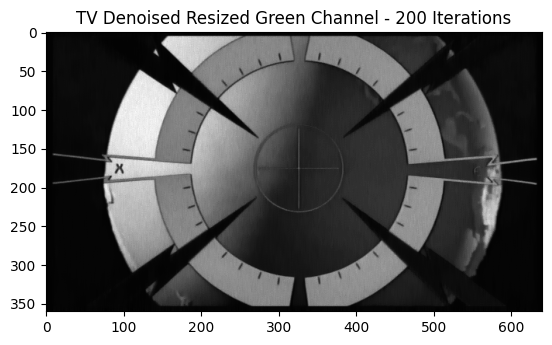

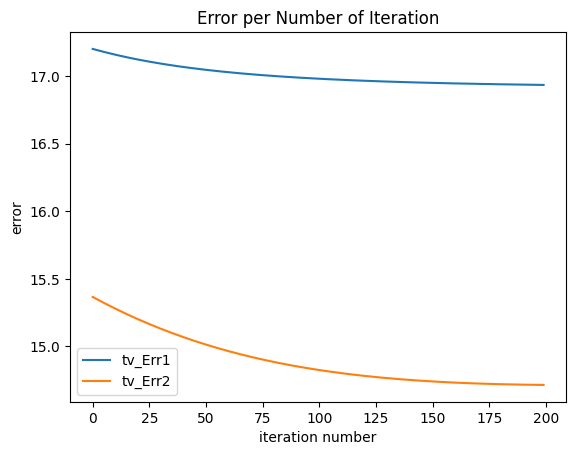

In [173]:
    # ====== YOUR CODE: ======
tv_denoised_image, tv_Err1, tv_Err2 = denoise_by_TV(noisy_image, resized_image, 200, 20, 2e-5)

#display denoised image
plt.imshow(tv_denoised_image, cmap = 'gray')
plt.title ('TV Denoised Resized Green Channel - 200 Iterations')
plt.show()

#display graph
plt.figure()
iteration = np.linspace(0,199,200)
plt.plot(iteration , np.log(tv_Err1), label = 'tv_Err1')
plt.plot(iteration , np.log(tv_Err2), label = 'tv_Err2')
plt.xlabel('iteration number')
plt.ylabel('error')
plt.title('Error per Number of Iteration')
plt.legend()
plt.show()
    # ========================

### 3.d - Results analysis
Express your opinion regarding the results. Present the L2 and TV restorations side by side and the errors plots side by side. Compare the results quantitivly (using `Err1,2` values) and qualitativly (by looking at the restored images). Do your results fit the theory taught in class? 

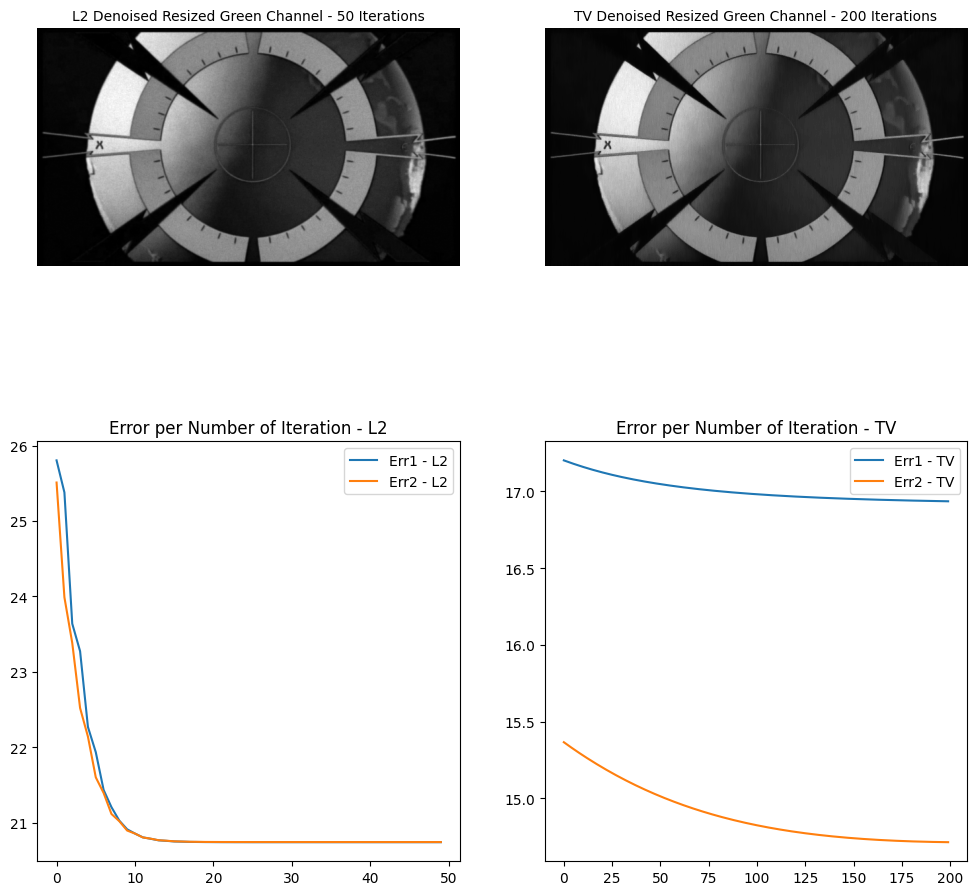

In [175]:
    # ====== YOUR CODE: ======
fig, axs = plt.subplots(2,2, figsize=(12,12))
axs[0][0].imshow(l2_denoised_image, cmap = 'gray')
axs[0][0].set_title('L2 Denoised Resized Green Channel - 50 Iterations', fontsize=10)
axs[0][0].axis('off')
axs[0][1].imshow(tv_denoised_image, cmap = 'gray')
axs[0][1].set_title('TV Denoised Resized Green Channel - 200 Iterations', fontsize=10)
axs[0][1].axis('off')
iteration_50 = np.linspace(0,49,50)
iteration_500 = np.linspace(0,199,200)
axs[1][0].plot(iteration_50 , np.log(l2_Err1), label = 'Err1 - L2')
axs[1][0].plot(iteration_50 , np.log(l2_Err2), label = 'Err2 - L2')
axs[1][0].set_title('Error per Number of Iteration - L2')
axs[1][0].legend()
axs[1][1].plot(iteration_500 , np.log(tv_Err1), label = 'Err1 - TV')
axs[1][1].plot(iteration_500 , np.log(tv_Err2), label = 'Err2 - TV')
axs[1][1].set_title('Error per Number of Iteration - TV')
axs[1][1].legend()
plt.show()

    # ========================

### 3.e - From synthetic to natural
Up to this point we worked with a synthetic image (created by computer graphics). We now want to test the performance of both algorithms using more "natural" images. 

Choose another frame from the video `Flash Gordon Trailer.mp4`. The frame must be taken from the time section `00:38-00:39` and must contain a natural image. Choose one of the color channels of the frame (Red or Green), decrease the size of the image by a factor of 2, and make a noisy image (according to the instructions in section 3.a). Repeat the denoising processes (1.b, 1.c). Display the restored images and the errors plots in your report. Explain - what are the differences examining the natural images results in comparison to the synthetic ones? Discuss `Err1,2` values and the restored images quality.

C:\Users\dorye\AppData\Local\Temp\ipykernel_37664\4155042844.py:39: RuntimeWarning: overflow encountered in scalar add
  mu = (G.T @ G) / (G.T@G + G.T @ G_conv_D_squared)


(360, 640)


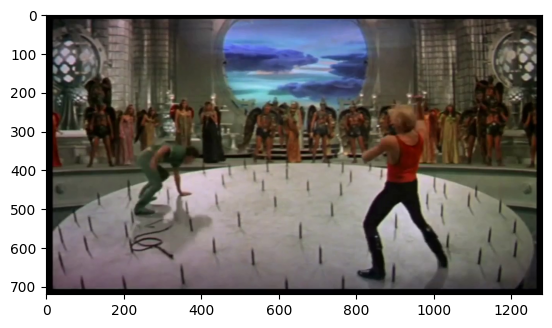

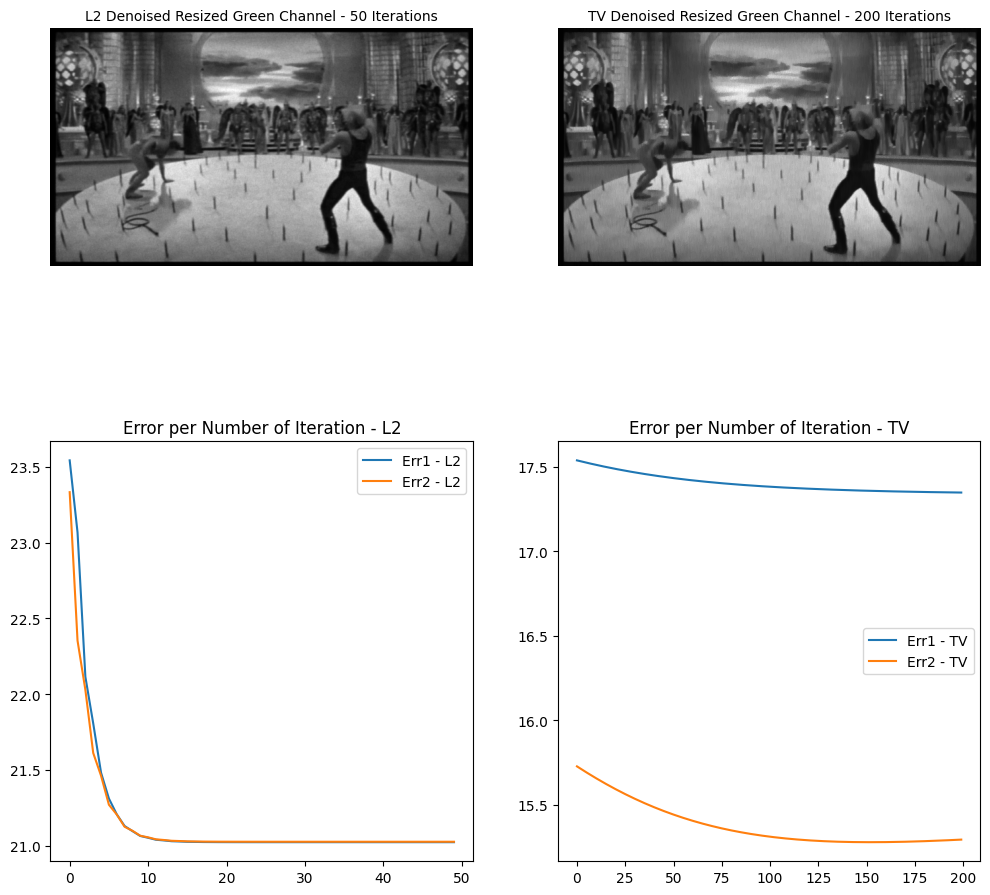

In [184]:
    # ====== YOUR CODE: ======
video_path = os.path.join("..", "given_data", "Flash Gordon Trailer.mp4")
video = cv2.VideoCapture(video_path)
frame_rate = video.get(cv2.CAP_PROP_FPS)
frame_number = int(frame_rate * 38)
video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = video.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
video.release()
green_channel = frame[:,:,1]
resized_image = cv2.resize(green_channel, (int(green_channel.shape[1]/2), int(green_channel.shape[0]/2)))
noisy_image = poisson_noisy_image(resized_image,3)
plt.imshow(frame)



l2_denoised_image2, l2_Err1_2, l2_Err2_2 = denoise_by_l2(noisy_image, resized_image, 50, 0.5)
tv_denoised_image2, tv_Err1_2, tv_Err2_2 = denoise_by_TV(noisy_image, resized_image, 200, 20, 2e-5)

fig, axs = plt.subplots(2,2, figsize=(12,12))
axs[0][0].imshow(l2_denoised_image2, cmap = 'gray')
axs[0][0].set_title('L2 Denoised Resized Green Channel - 50 Iterations', fontsize=10)
axs[0][0].axis('off')
axs[0][1].imshow(tv_denoised_image2, cmap = 'gray')
axs[0][1].set_title('TV Denoised Resized Green Channel - 200 Iterations', fontsize=10)
axs[0][1].axis('off')
iteration_50 = np.linspace(0,49,50)
iteration_500 = np.linspace(0,199,200)
axs[1][0].plot(iteration_50 , np.log(l2_Err1_2), label = 'Err1 - L2')
axs[1][0].plot(iteration_50 , np.log(l2_Err2_2), label = 'Err2 - L2')
axs[1][0].set_title('Error per Number of Iteration - L2')
axs[1][0].legend()
axs[1][1].plot(iteration_500 , np.log(tv_Err1_2), label = 'Err1 - TV')
axs[1][1].plot(iteration_500 , np.log(tv_Err2_2), label = 'Err2 - TV')
axs[1][1].set_title('Error per Number of Iteration - TV')
axs[1][1].legend()
plt.show()

In [99]:
    # ====== YOUR CODE: ======

    # ========================

In [100]:
    # ====== YOUR CODE: ======

    # ========================

In [101]:
    # ====== YOUR CODE: ======

    # ========================

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com